# Генеративная модель на основе гауссовых смесей

In [14]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

Гауссовы смеси — естественное математическое обобщение алгоритма `K-means`. По сути, подход ищет не просто какие-то кучки вокруг формирующихся центроидов, а некоторую смесь многомерных нормальных распределений (по сути — тоже кучки вокруг средних со своими дисперсиями). Так как такой подход оценивает плотности распределений, то он часто используется в задачах KDE (kernel density estimation). В том числе, он может быть применен к задаче генерации: если есть плотность распределения, то можно семплировать и получать новые объекты. Давайте посмотрим на простейший пример решения такой задачи.

Работать будем опять-таки с `MNIST`. Так как модель оказывается крайне тяжеловесной, будем использовать «простой» набор данных. Визуализируем элементы этого набора данных (для наглядности)

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

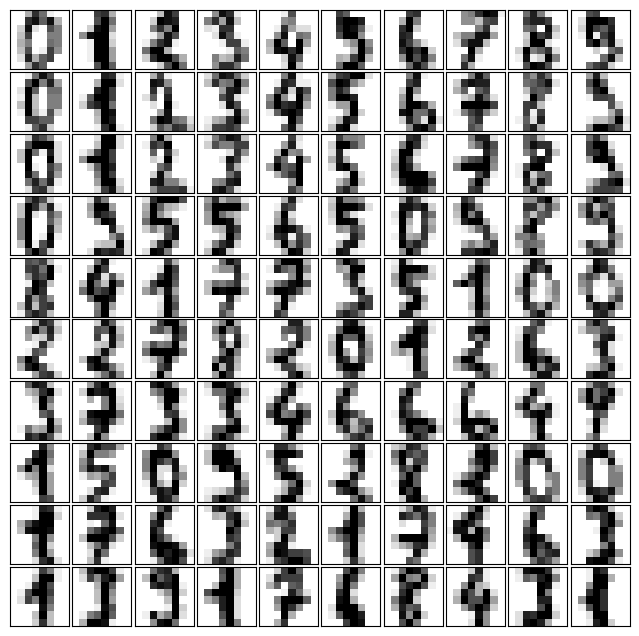

In [3]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits.data[i].reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

Для того, чтобы обучение проходило быстрее имеет смысл снизить размерность пространства признаков. Произведите преобразования для всего набора данных помощи <code>PCA(n_components=0.99, svd_solver=='full')</code>.


In [10]:
pca = PCA(n_components=0.99, svd_solver='full')

digits_pca = pca.fit_transform(digits.data)

Введите число полученных ГК

In [13]:
print(f'Число полученных ГК: {digits_pca.shape[1]}')

Число полученных ГК: 41


Обучим интересующую нас модель, подобрав гиперпараметр, отвечающий за число используемых компонент, минимизируя <a href="https://ru.wikipedia.org/wiki/Информационный_критерий_Акаике">информационный критерий Акаике</a>.

Для значений параметра <code>n_components</code> в диапазоне $[50,250)$ с шагом $10$ обучите модели <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html"><code>GaussianMixture</code></a> с параметрами, указанными в вашем задании. При помоши метода <code>.aic()</code> вычислите значение критерия каждой модели.

Введите значение <code>n_components</code> модели с наименьшим значением критерия Акаике.




In [15]:
# обучим модели GaussianMixture с параметрами covariance_type='full', random_state=9
n, akaike = 0, 2**10

for n_components in range(50, 250, 10):
  gaus = GaussianMixture(n_components=n_components, covariance_type='full', random_state=9).fit(digits_pca)
  aic = gaus.aic(digits_pca)
  if aic < akaike:
    n, akaike = n_components, aic

print(f'n_components модели с наименьшим значением критерия Акаике: {n}')

n_components модели с наименьшим значением критерия Акаике: 170


Обучите финальную модель на подобранном гиперпараметре. Проверьте, что обучение сошлось (поле <code>.converged_</code> модели).

In [16]:
gm = GaussianMixture(n_components=n, covariance_type='full', random_state=9).fit(digits_pca)
if gm.converged_:
  print('Обучение сошлось')

Обучение сошлось


При помощи метода <code>.sample()</code> сгенерируйте $100$ новых объектов.

Введите выборочное среднее коориднаты с индексом $0$ сгенерированных объектов.

In [17]:
# при помощи метода .sample() сгенерируем 100 новых объектов
samples, _ = gm.sample(100)

In [18]:
# найдем выборочное среднее коориднаты с индексом 0 сгенерированных объектов
print(f'Выборочное среднее координаты с индексом 0: {round(samples[:, 0].mean(), 3)}')

Выборочное среднее координаты с индексом 0: -0.399


При помоши метода <code>.inverse_transform()</code> класса <code>PCA</code> верните сгенерированные объекты в пространство исходных признаков.

In [19]:
inverse_samples = pca.inverse_transform(samples)
inverse_samples.shape

(100, 64)

Визуализируйте полученные результаты. Введите номер изображения, соответствующего сгенерированному объекту с индексом $5$ (индексация начинается с нуля)

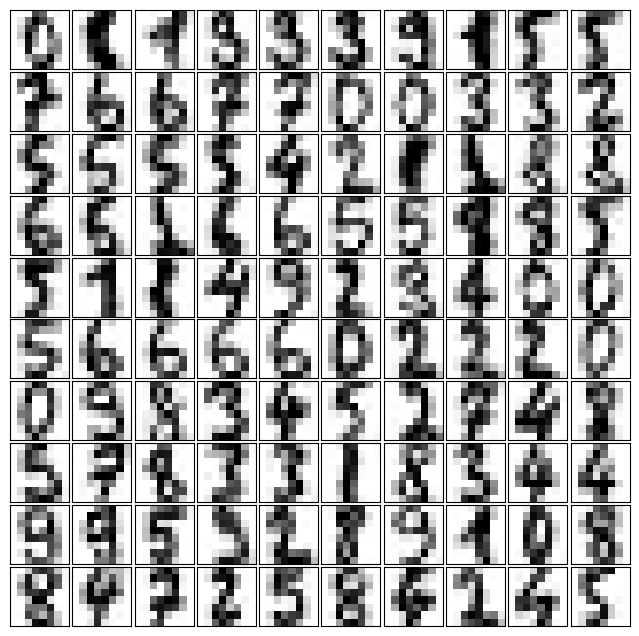

In [20]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(inverse_samples[i].reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

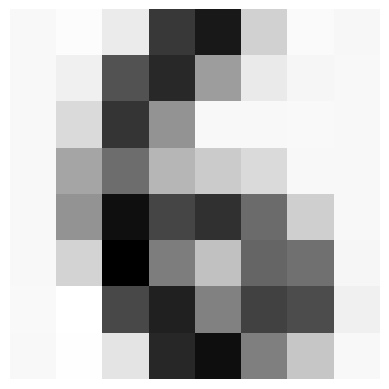

In [25]:
plt.imshow(inverse_samples[30].reshape((8, 8)), cmap='gray_r')
plt.axis('off')
plt.show()